# Ταξινόμηση κειμενικής πληροφορίας
- Ταξινομητές που χρησιμοποιήθηκαν
    - Naive Bayes
    - Random Forest
    - Logistic Regression
    - K-nearest neighbors
    - Support vector machine
    
- Dataset: <a href='http://times.cs.uiuc.edu/~wang296/Data/'>Six Categories of Amazon Product Reviews</a>

In [1]:
# for Python 2: use print only as a function
%matplotlib inline
import matplotlib.pyplot as plt
from __future__ import print_function
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.cross_validation import train_test_split
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier 
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import cross_val_score
from sklearn.pipeline import Pipeline

### Φόρτωση των δεδομένων

In [2]:
import pandas as pd
df = pd.read_csv('reviews.csv')
df.shape

(27320, 14)

### Επισκόπηση των πρώτων γραμμών

In [3]:
df.head()

,raw_review,id,review,real_category,lda_catogories,lda_catogories_12,lda_catogories_4,lda_catogories_5,lda_catogories_6,lda_catogories_7,lda_catogories_8,lda_catogories_9,lda_catogories_10,lda_catogories_11
0,I love this phone so much! I had this phone f...,B006QMZCT0_0,"[u'love', u'phone', u'much', u'phone', u'year'...",mobilephone,"[('cameras', 0.353), ('tablets', 0.169), ('lap...","[('cameras', 0.101), ('tablets', 0.102), ('TVs...","[('laptops', 0.118), ('mobilephone', 0.314), (...","[('TVs', 0.242), ('tablets', 0.108), ('laptops...","[('mobilephone', 0.976), ('video_surveillance'...","[('TVs', 0.279), ('mobilephone', 0.18), ('vide...","[('tablets', 0.059), ('laptops', 0.061), ('tab...","[('laptops', 0.022), ('laptops', 0.242), ('TVs...","[('tablets', 0.074), ('tablets', 0.163), ('tab...","[('laptops', 0.029), ('cameras', 0.174), ('lap..."
1,This phone often just freezes or turns itself ...,B006QMZCT0_1,"[u'phone', u'often', u'just', u'freez', u'turn...",mobilephone,"[('cameras', 0.104), ('tablets', 0.039), ('lap...","[('cameras', 0.01), ('tablets', 0.004), ('TVs'...","[('laptops', 0.039), ('mobilephone', 0.097), (...","[('TVs', 0.057), ('tablets', 0.025), ('laptops...","[('mobilephone', 0.375), ('video_surveillance'...","[('TVs', 0.07), ('mobilephone', 0.05), ('video...","[('tablets', 0.015), ('laptops', 0.014), ('tab...","[('laptops', 0.009), ('laptops', 0.057), ('TVs...","[('tablets', 0.016), ('tablets', 0.036), ('tab...","[('laptops', 0.022), ('cameras', 0.029), ('lap..."
2,What I would have like to know before I purcha...,B006QMZCT0_2,"[u'like', u'know', u'purchas', u'product', u'r...",mobilephone,"[('cameras', 0.173), ('tablets', 0.18), ('lapt...","[('cameras', 0.046), ('tablets', 0.085), ('TVs...","[('laptops', 0.171), ('mobilephone', 0.245), (...","[('TVs', 0.221), ('tablets', 0.201), ('laptops...","[('mobilephone', 0.479), ('video_surveillance'...","[('TVs', 0.27), ('mobilephone', 0.234), ('vide...","[('tablets', 0.078), ('laptops', 0.087), ('tab...","[('laptops', 0.117), ('laptops', 0.21), ('TVs'...","[('tablets', 0.043), ('tablets', 0.245), ('tab...","[('laptops', 0.117), ('cameras', 0.087), ('lap..."
3,I bought two of these phones for my kids. Bot...,B006QMZCT0_3,"[u'bought', u'phone', u'kid', u'phone', u'brok...",mobilephone,"[('cameras', 0.067), ('tablets', 0.02), ('lapt...","[('cameras', 0.002), ('tablets', 0.008), ('TVs...","[('laptops', 0.013), ('mobilephone', 0.055), (...","[('TVs', 0.027), ('tablets', 0.013), ('laptops...","[('mobilephone', 0.228), ('video_surveillance'...","[('TVs', 0.037), ('mobilephone', 0.025), ('vid...","[('tablets', 0.004), ('laptops', 0.0), ('table...","[('laptops', 0.003), ('laptops', 0.024), ('TVs...","[('tablets', 0.004), ('tablets', 0.023), ('tab...","[('laptops', 0.002), ('cameras', 0.022), ('lap..."
4,"Liked the phone, but after a while I started h...",B006QMZCT0_4,"[u'like', u'phone', u'start', u'issu', u'call'...",mobilephone,"[('cameras', 0.086), ('tablets', 0.06), ('lapt...","[('cameras', 0.016), ('tablets', 0.028), ('TVs...","[('laptops', 0.069), ('mobilephone', 0.085), (...","[('TVs', 0.039), ('tablets', 0.085), ('laptops...","[('mobilephone', 0.378), ('video_surveillance'...","[('TVs', 0.05), ('mobilephone', 0.108), ('vide...","[('tablets', 0.024), ('laptops', 0.022), ('tab...","[('laptops', 0.037), ('laptops', 0.039), ('TVs...","[('tablets', 0.025), ('tablets', 0.113), ('tab...","[('laptops', 0.032), ('cameras', 0.018), ('lap..."


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27320 entries, 0 to 27319
Data columns (total 14 columns):
raw_review           27320 non-null object
id                   27320 non-null object
review               27320 non-null object
real_category        27320 non-null object
lda_catogories       27320 non-null object
lda_catogories_12    27320 non-null object
lda_catogories_4     27320 non-null object
lda_catogories_5     27320 non-null object
lda_catogories_6     27320 non-null object
lda_catogories_7     27320 non-null object
lda_catogories_8     27320 non-null object
lda_catogories_9     27320 non-null object
lda_catogories_10    27320 non-null object
lda_catogories_11    27320 non-null object
dtypes: object(14)
memory usage: 2.9+ MB


### Επιλογή των απαραίτητων χαρακτηριστικών για την εφαρμογή των μοντέλων

In [5]:
reviews_df = df[['raw_review', 'real_category']].copy()

In [6]:
# examine the first and last 5 rows
reviews_df.head(5)

,raw_review,real_category
0,I love this phone so much! I had this phone f...,mobilephone
1,This phone often just freezes or turns itself ...,mobilephone
2,What I would have like to know before I purcha...,mobilephone
3,I bought two of these phones for my kids. Bot...,mobilephone
4,"Liked the phone, but after a while I started h...",mobilephone


### Στατιστικά στοιχεία του νέου dataframe

In [7]:
reviews_df.groupby('real_category').describe()

raw_review
real_category                                                               
TVs                count                                                4461
                   unique                                               3907
                   top     Just a great TV for the price.  We are very ha...
                   freq                                                    2
cameras            count                                                4578
                   unique                                               2899
                   top     After many months of going back and fourth bet...
                   freq                                                    2
laptops            count                                                4312
                   unique                                               3677
                   top     This is a nice device.  For $200, you would be...
                   freq                                                    3
mobilephone        count                                                4812
                   unique                                               3155
                   top     I love my moto g. it does everything all other...
                   freq                                                    3
tablets            count                                                4482
                   unique                                               4479
                   top     Ordered it just before Christmas...got it on t...
                   freq                                                    3
video_surveillance count                                                4675
                   unique                                               4665
                   top     The best you can get for the price. Theres no ...
                   freq                                                    2

### Προσθήκη στήλης με το μήκος του κάθε review

In [8]:
reviews_df['length'] = reviews_df['raw_review'].map(lambda text: len(text))
reviews_df.head()

,raw_review,real_category,length
0,I love this phone so much! I had this phone f...,mobilephone,1081
1,This phone often just freezes or turns itself ...,mobilephone,281
2,What I would have like to know before I purcha...,mobilephone,936
3,I bought two of these phones for my kids. Bot...,mobilephone,126
4,"Liked the phone, but after a while I started h...",mobilephone,416


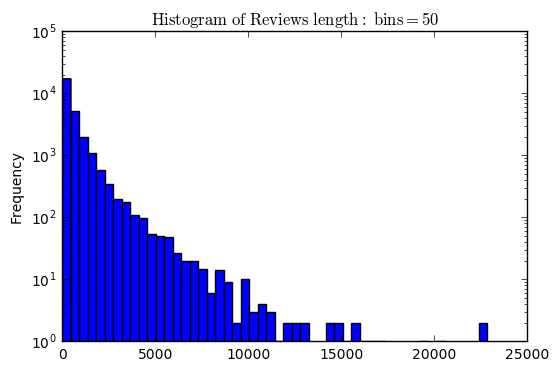

In [104]:
reviews_df.length.plot(bins=50, kind='hist',logy=True,title=r"$\mathrm{Histogram\ of\ Reviews\ length:\ bins=50}$")

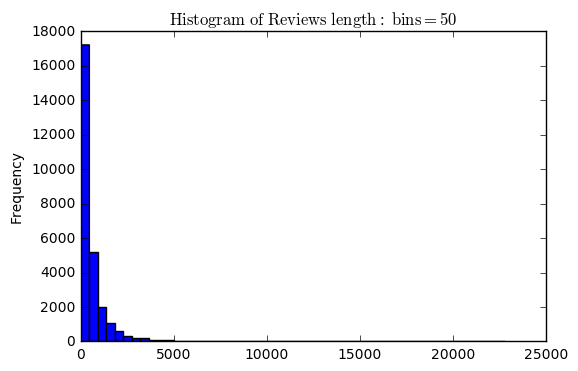

In [103]:
reviews_df.length.plot(bins=50, kind='hist',title=r"$\mathrm{Histogram\ of\ Reviews\ length:\ bins=50}$")

In [10]:
reviews_df.length.describe()

count    27320.000000
mean       628.336896
std        995.436464
min          1.000000
25%        155.000000
50%        304.000000
75%        683.250000
max      22828.000000
Name: length, dtype: float64

### Ιστογράμματα ανά κατηγορία

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4137856050>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f41361bd3d0>]], dtype=object)

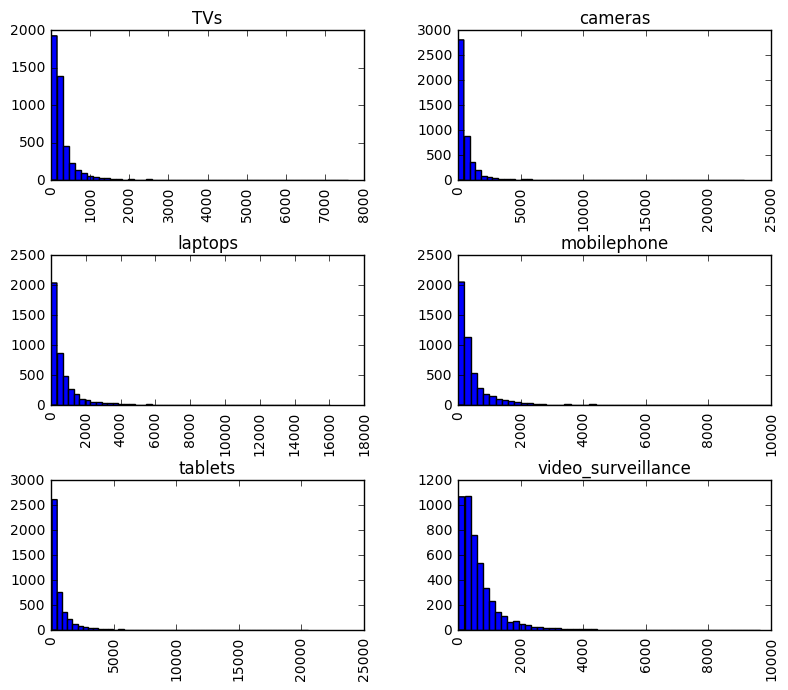

In [136]:
reviews_df.hist(column='length', by='real_category', bins=50,figsize=(9, 8))

In [12]:
# convert label to a numerical variable
d = {'mobilephone':0, 'cameras':1, 'video_surveillance':2, 'TVs':3, 'tablets':4 , 'laptops':5}
reviews_df['real_category_num'] = reviews_df.real_category.map(d)

### Προσθήκη στήλης με ακέραιο αριθμό που αντιστοιχεί στην κατηγορία
```
{
    'mobilephone':0, 
    'cameras':1, 
    'video_surveillance':2, 
    'TVs':3, 
    'tablets':4 , 
    'laptops':5
}
```

In [13]:
reviews_df.head()

,raw_review,real_category,length,real_category_num
0,I love this phone so much! I had this phone f...,mobilephone,1081,0
1,This phone often just freezes or turns itself ...,mobilephone,281,0
2,What I would have like to know before I purcha...,mobilephone,936,0
3,I bought two of these phones for my kids. Bot...,mobilephone,126,0
4,"Liked the phone, but after a while I started h...",mobilephone,416,0


In [120]:
reviews_df.tail()

,raw_review,real_category,length,real_category_num
27315,"While the Chromebook is quick, light, portable...",laptops,689,5
27316,I purchased this for my 11 year old grandson f...,laptops,1125,5
27317,i did not realize the operating system would n...,laptops,519,5
27318,This is the worst laptop I've ever seen in my ...,laptops,123,5
27319,It does not do everything I need it to. I wil...,laptops,132,5


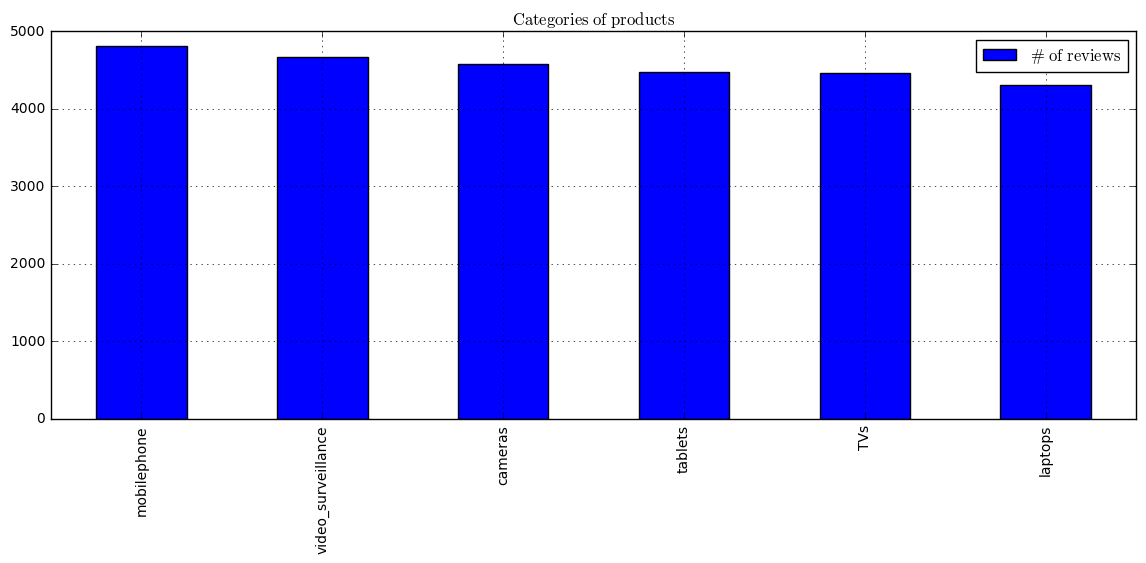

In [119]:
reviews_df.real_category.value_counts().plot(kind='bar', ax=None, figsize=(14,5), use_index=True, title=r"$\mathrm{Categories\ of\ products}$" , grid=True, legend=True, style=None, logy=False, label=r"$\mathrm{\#\ of\ reviews}$")

In [15]:
# how to define X and y for use with COUNTVECTORIZER
X = reviews_df.raw_review
y = reviews_df.real_category_num
print(X.shape)
print(y.shape)

(27320,)
(27320,)


In [16]:
# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(21856,)
(5464,)
(21856,)
(5464,)


In [17]:
# instantiate CountVectorizer
vect = CountVectorizer(max_df=0.7, min_df=2, stop_words='english', ngram_range=(1, 3))

In [18]:
# learn training data vocabulary, then use it to create a document-term matrix
X_train_dtm = vect.fit_transform(X_train)

In [19]:
# examine the document-term matrix
X_train_dtm

<21856x334982 sparse matrix of type '<type 'numpy.int64'>'
	with 1951975 stored elements in Compressed Sparse Row format>

In [20]:
# transform testing data (using fitted vocabulary) into a document-term matrix
X_test_dtm = vect.transform(X_test)
X_test_dtm

<5464x334982 sparse matrix of type '<type 'numpy.int64'>'
	with 367097 stored elements in Compressed Sparse Row format>

In [21]:
#NB = Naive Bayes
#RF = Random Forest
#LR = Logistic Regression
#KNN = k-nearest neighbors
#SVM = Support vector machine
models = {'NB':[],'RF':[],'LR':[],'KNN':[],'SVM':[]}

# Naive Bayes model

In [22]:
# instantiate a Multinomial Naive Bayes model
nb = MultinomialNB()

In [23]:
# train the model using X_train_dtm (timing it with an IPython "magic command")
%time nb.fit(X_train_dtm, y_train)

CPU times: user 160 ms, sys: 4 ms, total: 164 ms
Wall time: 175 ms


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [24]:
# make class predictions for X_test_dtm
y_pred_class = nb.predict(X_test_dtm)

In [25]:
# calculate accuracy of class predictions
res = metrics.accuracy_score(y_test, y_pred_class)
models['NB'].append(res)
print("Accuracy: %0.2f %%" % (res * 100))

Accuracy: 91.69 %


In [26]:
# print the confusion matrix
metrics.confusion_matrix(y_test, y_pred_class)

array([[852,   3,  20,   3,  48,   5],
       [  2, 843,  29,   1,  16,   2],
       [  5,   2, 915,   4,  12,   6],
       [  4,   1,  56, 803,  39,  11],
       [ 19,   1,  29,   3, 827,  19],
       [  5,   3,   8,   2,  96, 770]])

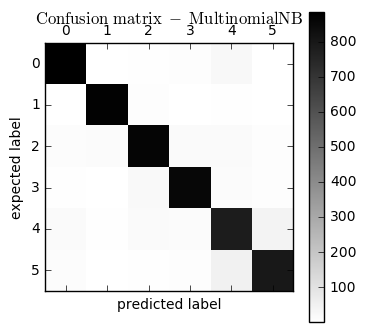

In [141]:
plt.matshow(metrics.confusion_matrix(y_test, y_pred_class), cmap=plt.cm.binary, interpolation='nearest')
plt.title(r"$\mathrm{Confusion\ matrix\ -\ MultinomialNB}$")
plt.colorbar()
plt.ylabel('expected label')
plt.xlabel('predicted label')

In [28]:
print (classification_report(y_test, y_pred_class))

             precision    recall  f1-score   support

          0       0.96      0.92      0.94       931
          1       0.99      0.94      0.97       893
          2       0.87      0.97      0.91       944
          3       0.98      0.88      0.93       914
          4       0.80      0.92      0.85       898
          5       0.95      0.87      0.91       884

avg / total       0.92      0.92      0.92      5464



In [142]:
pipeline = Pipeline([
        # strings to token integer counts
    ('bow', CountVectorizer(max_df=0.7, min_df=2, stop_words='english', ngram_range=(1, 3))),  
        # integer counts to weighted TF-IDF scores
    ('tfidf', TfidfTransformer()),
        # train on TF-IDF vectors w/ Naive Bayes classifier
    ('classifier', nb),  
])

In [30]:
scores = cross_val_score(pipeline,  # steps to convert raw messages into models
                         X,  # training data
                         y,  # training labels
                         cv=10,  # split data randomly into 10 parts: 9 for training, 1 for scoring
                         scoring='accuracy',  # which scoring metric?
                         n_jobs=-1,  # -1 = use all cores = faster
                         )
print(scores)

[ 0.88925439  0.93199269  0.93448023  0.90483163  0.91764275  0.92347126
  0.93994874  0.89967045  0.86556777  0.81721612]


In [31]:
models['NB'].append(scores.mean())
print("Accuracy: %0.2f %% (+/- %0.2f %%)" % (scores.mean() * 100, scores.std() * 2 * 100))

Accuracy: 90.24 % (+/- 7.15 %)


# Logistic regression model


In [32]:
# import and instantiate a logistic regression model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [33]:
# train the model using X_train_dtm
%time logreg.fit(X_train_dtm, y_train)

CPU times: user 50.3 s, sys: 808 ms, total: 51.1 s
Wall time: 25.7 s


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [34]:
# make class predictions for X_test_dtm
y_pred_class = logreg.predict(X_test_dtm)

In [35]:
# calculate accuracy
res = metrics.accuracy_score(y_test, y_pred_class)
models['LR'].append(res)
print("Accuracy: %0.2f %%" % (res * 100))

Accuracy: 93.89 %


In [36]:
# print the confusion matrix
metrics.confusion_matrix(y_test, y_pred_class)

array([[892,   5,   4,   5,  22,   3],
       [  3, 876,   7,   1,   3,   3],
       [ 10,   9, 873,  25,  17,  10],
       [  2,   2,  19, 873,  11,   7],
       [ 15,   8,  15,  15, 802,  43],
       [  6,   3,   5,   4,  52, 814]])

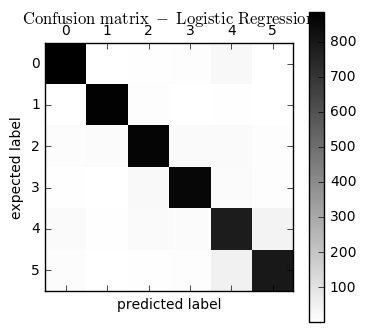

In [149]:
plt.matshow(metrics.confusion_matrix(y_test, y_pred_class), cmap=plt.cm.binary, interpolation='nearest')
plt.title(r"$\mathrm{Confusion\ matrix\ -\ Logistic\ Regression}$")
plt.colorbar()
plt.ylabel('expected label')
plt.xlabel('predicted label')

In [38]:
print (classification_report(y_test, y_pred_class))

             precision    recall  f1-score   support

          0       0.96      0.96      0.96       931
          1       0.97      0.98      0.98       893
          2       0.95      0.92      0.94       944
          3       0.95      0.96      0.95       914
          4       0.88      0.89      0.89       898
          5       0.93      0.92      0.92       884

avg / total       0.94      0.94      0.94      5464



In [39]:
pipeline = Pipeline([
    ('bow', CountVectorizer(max_df=0.7, min_df=2, stop_words='english', ngram_range=(1, 3))),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', logreg),  # train on TF-IDF vectors w/ Logistic Regression classifier
])

In [40]:
scores = cross_val_score(pipeline,  # steps to convert raw messages into models
                         X,  # training data
                         y,  # training labels
                         cv=10,  # split data randomly into 10 parts: 9 for training, 1 for scoring
                         scoring='accuracy',  # which scoring metric?
                         n_jobs=-1,  # -1 = use all cores = faster
                         )
print(scores)

[ 0.93567251  0.94771481  0.94070278  0.92606149  0.95204978  0.94653973
  0.95862321  0.92859758  0.89047619  0.84322344]


In [41]:
models['LR'].append(scores.mean())
print("Accuracy: %0.2f %% (+/- %0.2f %%)" % (scores.mean() * 100, scores.std() * 2 * 100))

Accuracy: 92.70 % (+/- 6.65 %)


# Random Forest model

In [161]:
# 1. instantiate a Random Forest model
rf = RandomForestClassifier()
# 2. train the model using X_train_dtm
rf.fit(X_train_dtm, y_train)
# 3. make class predictions for X_test_dtm
y_pred_class = rf.predict(X_test_dtm)

In [162]:
# calculate accuracy
res = metrics.accuracy_score(y_test, y_pred_class)
models['RF'].append(res)
print("Accuracy: %0.2f %%" % (res * 100))

Accuracy: 86.84 %


In [163]:
# print the confusion matrix
metrics.confusion_matrix(y_test, y_pred_class)

array([[883,   4,   6,  18,  14,   6],
       [  0, 843,  18,   8,  12,  12],
       [ 16,  18, 813,  61,  22,  14],
       [  5,   6,  34, 843,   9,  17],
       [ 46,  16,  44,  55, 681,  56],
       [ 21,  10,  28,  46,  97, 682]])

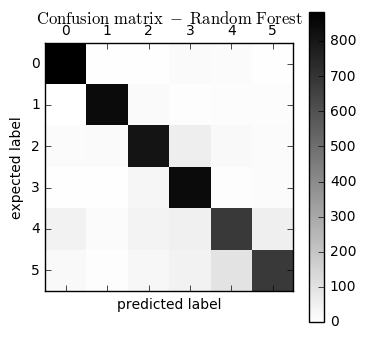

In [164]:
plt.matshow(metrics.confusion_matrix(y_test, y_pred_class), cmap=plt.cm.binary, interpolation='nearest')
plt.title(r"$\mathrm{Confusion\ matrix\ -\ Random\ Forest}$")
plt.colorbar()
plt.ylabel('expected label')
plt.xlabel('predicted label')

In [45]:
print (classification_report(y_test, y_pred_class))

             precision    recall  f1-score   support

          0       0.89      0.93      0.91       931
          1       0.94      0.95      0.95       893
          2       0.89      0.88      0.88       944
          3       0.84      0.94      0.89       914
          4       0.82      0.80      0.81       898
          5       0.92      0.81      0.86       884

avg / total       0.89      0.88      0.88      5464



In [173]:
pipeline = Pipeline([
    ('bow', CountVectorizer(max_df=0.7, min_df=2, stop_words='english', ngram_range=(1, 3))),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', rf),  # train on TF-IDF vectors w/ Random Forest classifier
])

In [174]:
scores = cross_val_score(pipeline,  # steps to convert raw messages into models
                         X,  # training data
                         y,  # training labels
                         cv=10,  # split data randomly into 10 parts: 9 for training, 1 for scoring
                         scoring='accuracy',  # which scoring metric?
                         n_jobs=-1,  # -1 = use all cores = faster
                         )
print(scores)

[ 0.85818713  0.90310786  0.8817716   0.84590044  0.88396779  0.87879897
  0.91468327  0.86634932  0.84542125  0.74285714]


In [175]:
models['RF'].append(scores.mean())
print("Accuracy: %0.2f %% (+/- %0.2f %%)" % (scores.mean() * 100, scores.std() * 2 * 100))

Accuracy: 86.21 % (+/- 9.03 %)


# KNN model

In [49]:
# try K=1 through K=25 and record testing accuracy
k_range = list(range(1, 26))
knnscores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_dtm, y_train)
    y_pred = knn.predict(X_test_dtm)
    knnscores.append(metrics.accuracy_score(y_test, y_pred))

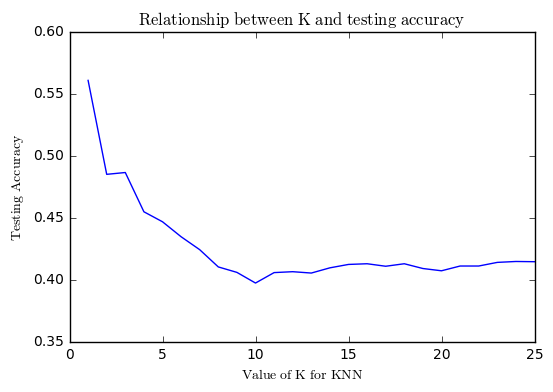

In [185]:
# plot the relationship between K and testing accuracy
plt.plot(k_range, knnscores)
plt.title(r"$\mathrm{Relationship\ between\ K\ and\ testing\ accuracy}$")
plt.xlabel(r"$\mathrm{Value\ of\ K\ for\ KNN}$")
plt.ylabel(r"$\mathrm{Testing\ Accuracy}$")

In [187]:
# try K=1, record testing accuracy
# 1. instantiate a KNeighborsClassifier model
knn = KNeighborsClassifier(n_neighbors=1)
# 2. train the model using X_train_dtm
knn.fit(X_train_dtm, y_train)
# 3. make class predictions for X_test_dtm
y_pred_class = knn.predict(X_test_dtm)
# 4. Accuracy calculation
res = metrics.accuracy_score(y_test, y_pred_class)
#models['KNN'].append(res)
print("Accuracy: %0.2f %%" % (res * 100))

Accuracy: 56.06 %


In [188]:
# print the confusion matrix
metrics.confusion_matrix(y_test, y_pred_class)

array([[647,  46,   1, 212,  23,   2],
       [ 13, 692,   3, 122,  59,   4],
       [ 28, 107, 250, 440, 101,  18],
       [  9,  44,   8, 841,  10,   2],
       [ 34,  93,  18, 455, 274,  24],
       [ 16,  92,  10, 358,  49, 359]])

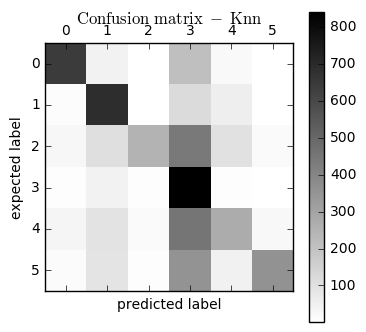

In [192]:
plt.matshow(metrics.confusion_matrix(y_test, y_pred_class), cmap=plt.cm.binary, interpolation='nearest')
plt.title("$\mathrm{Confusion\ matrix\ -\ Knn}$")
plt.colorbar()
plt.ylabel('expected label')
plt.xlabel('predicted label')

In [54]:
print (classification_report(y_test, y_pred_class))

             precision    recall  f1-score   support

          0       0.87      0.69      0.77       931
          1       0.64      0.77      0.70       893
          2       0.86      0.26      0.41       944
          3       0.35      0.92      0.50       914
          4       0.53      0.31      0.39       898
          5       0.88      0.41      0.56       884

avg / total       0.69      0.56      0.55      5464



In [55]:
pipeline = Pipeline([
    ('bow', CountVectorizer(max_df=0.7, min_df=2, stop_words='english', ngram_range=(1, 3))),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', knn),  # train on TF-IDF vectors w/ Knn classifier
])

In [56]:
scores = cross_val_score(pipeline,  # steps to convert raw messages into models
                         X,  # training data
                         y,  # training labels
                         cv=10,  # split data randomly into 10 parts: 9 for training, 1 for scoring
                         scoring='accuracy',  # which scoring metric?
                         n_jobs=-1,  # -1 = use all cores = faster
                         )
print(scores)

[ 0.56359649  0.54442413  0.54245974  0.41691069  0.79099561  0.4544123
  0.54522153  0.39069938  0.34615385  0.28937729]


In [57]:
models['KNN'].append(scores.mean())
print("Accuracy: %0.2f %% (+/- %0.2f %%)" % (scores.mean() * 100, scores.std() * 2 * 100))

Accuracy: 48.84 % (+/- 26.99 %)


# SVM model

In [58]:
from sklearn import svm
svm_clf = svm.SVC(kernel='linear')
# train the model using X_train_dtm
%time svm_clf.fit(X_train_dtm, y_train)

CPU times: user 1min 27s, sys: 632 ms, total: 1min 27s
Wall time: 1min 29s


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [193]:
# make class predictions for X_test_dtm
y_pred_class = svm_clf.predict(X_test_dtm)

In [194]:
# calculate accuracy
res = metrics.accuracy_score(y_test, y_pred_class)
models['SVM'].append(res)
print("Accuracy: %0.2f %%" % (res * 100))

Accuracy: 92.75 %


In [195]:
# print the confusion matrix
metrics.confusion_matrix(y_test, y_pred_class)

array([[885,   1,   6,  11,  27,   1],
       [  2, 872,   9,   3,   5,   2],
       [ 13,  16, 865,  20,  21,   9],
       [  6,   1,  22, 858,  17,  10],
       [ 21,   7,  21,  16, 788,  45],
       [ 12,   4,   6,  10,  52, 800]])

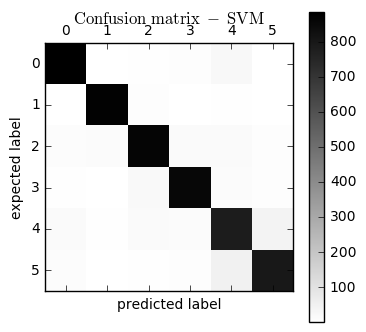

In [196]:
plt.matshow(metrics.confusion_matrix(y_test, y_pred_class), cmap=plt.cm.binary, interpolation='nearest')
plt.title("$\mathrm{Confusion\ matrix\ -\ SVM}$")
plt.colorbar()
plt.ylabel('expected label')
plt.xlabel('predicted label')

In [63]:
print (classification_report(y_test, y_pred_class))

             precision    recall  f1-score   support

          0       0.94      0.95      0.95       931
          1       0.97      0.98      0.97       893
          2       0.93      0.92      0.92       944
          3       0.93      0.94      0.94       914
          4       0.87      0.88      0.87       898
          5       0.92      0.90      0.91       884

avg / total       0.93      0.93      0.93      5464



In [64]:
pipeline = Pipeline([
    ('bow', CountVectorizer(max_df=0.7, min_df=2, stop_words='english', ngram_range=(1, 3))),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', svm_clf),  # train on TF-IDF vectors w/ SVM classifier
])

In [65]:
scores = cross_val_score(pipeline,  # steps to convert raw messages into models
                         X,  # training data
                         y,  # training labels
                         cv=10,  # split data randomly into 10 parts: 9 for training, 1 for scoring
                         scoring='accuracy',  # which scoring metric?
                         n_jobs=-1,  # -1 = use all cores = faster
                         )
print(scores)

[ 0.94152047  0.95648995  0.94948755  0.93850659  0.95095168  0.94617356
  0.96594654  0.93299158  0.8996337   0.86007326]


In [66]:
models['SVM'].append(scores.mean())
print("Accuracy: %0.2f %% (+/- %0.2f %%)" % (scores.mean() * 100, scores.std() * 2 * 100))

Accuracy: 93.42 % (+/- 5.98 %)


In [67]:
modelsTT = {}
for i in models.keys():
    modelsTT[i] = models[i][0]
    
modelsCV = {}
for i in models.keys():
    modelsCV[i] = models[i][1]

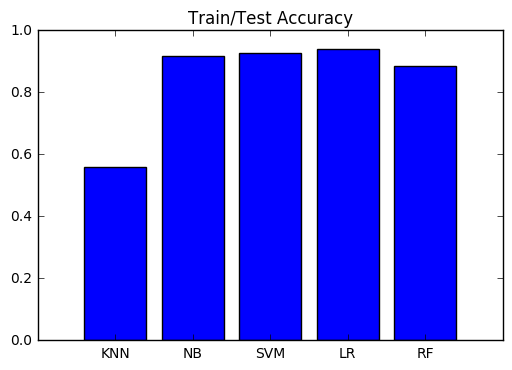

In [68]:
plt.title('Train/Test Accuracy')
plt.bar(range(len(modelsTT)), modelsTT.values(), align='center')
plt.xticks(range(len(modelsTT)), modelsTT.keys())

plt.show()

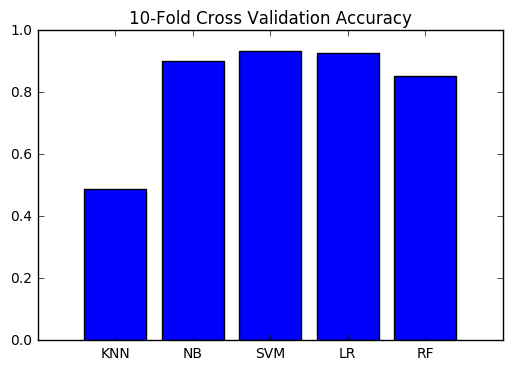

In [69]:
plt.title('10-Fold Cross Validation Accuracy')
plt.bar(range(len(modelsCV)), modelsCV.values(), align='center')
plt.xticks(range(len(modelsCV)), modelsCV.keys())
plt.show()

## Train/Test vs 10-Fold Cross Validation Accuracy

![alt text](http://i.imgur.com/0RDXuk4.png "Train/Test vs 10-Fold Cross Validation Accuracy")